In [109]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings("ignore")

In [110]:
path_dir='./crypto_data/'

In [111]:
df = pd.DataFrame()

for file in os.listdir(path_dir):
    if file.endswith(".csv"):
        df = pd.concat([df , pd.read_csv(os.path.join(path_dir, file),infer_datetime_format=True)], axis=0 )

df.reset_index(drop=True, inplace=True)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [112]:
df.isnull().any()

SNo          False
Name         False
Symbol       False
Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Marketcap    False
dtype: bool

In [115]:
df['Date']=pd.to_datetime(df['Date']).dt.date

In [116]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [117]:
df.to_csv('final.csv')

#### Finding the top 10 crytpocurrencies by market cap

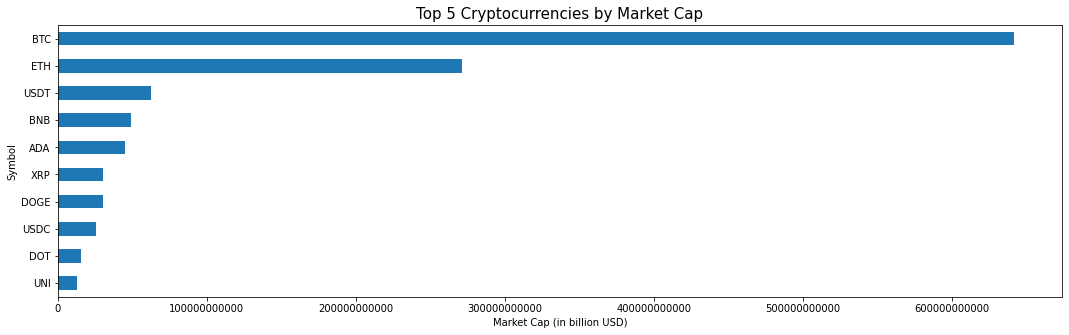

In [121]:
plt.figure(figsize=(18,5))
ax = df.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh')
ax.set_xlabel("Market Cap (in billion USD)")
ax.ticklabel_format( style='plain', axis='x')
plt.title("Top 5 Cryptocurrencies by Market Cap", fontsize=15)
plt.show()

Here we can see that Bitcoin is the highest value according to market cap and etherum is 50% of it. and all other are very less in comparison to it.

In [126]:
top10_df=df[(df.Symbol=='UNI')|(df.Symbol=='DOT')|(df.Symbol=='USDC')|(df.Symbol=='DOGE')|(df.Symbol=='XRP')|(df.Symbol=='ADA')|(df.Symbol=='BNB')|(df.Symbol=='USDT')|(df.Symbol=='ETH')|(df.Symbol=='BTC')]
top10_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
275,1,Binance Coin,BNB,2017-07-26,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
276,2,Binance Coin,BNB,2017-07-27,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
277,3,Binance Coin,BNB,2017-07-28,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
278,4,Binance Coin,BNB,2017-07-29,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
279,5,Binance Coin,BNB,2017-07-30,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


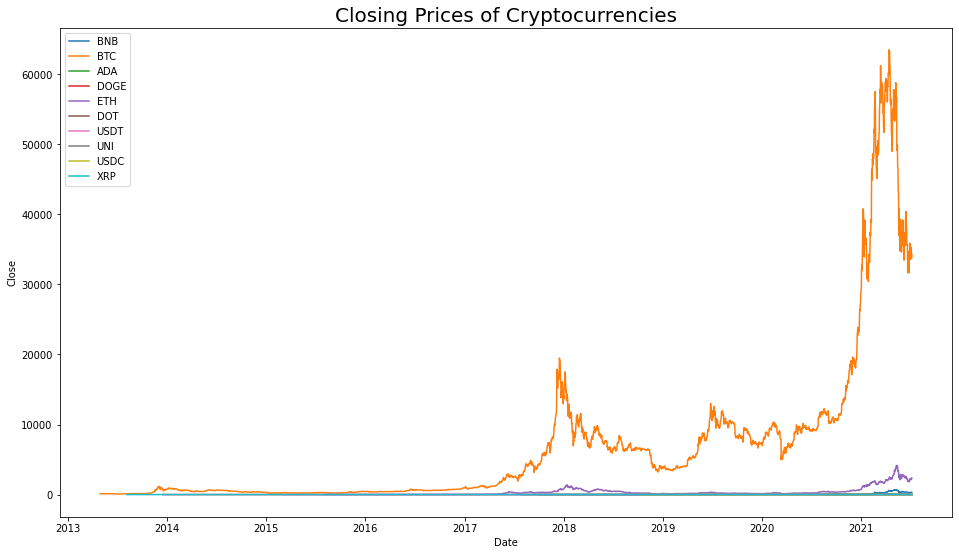

In [127]:

plt.figure(figsize=(16,9))
sns.lineplot(data=top10_df, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Cryptocurrencies", fontsize=20)
plt.legend(loc='best')

BTC is value is very high as compared to other coin. Remove BTC price to clearly study about other coin.

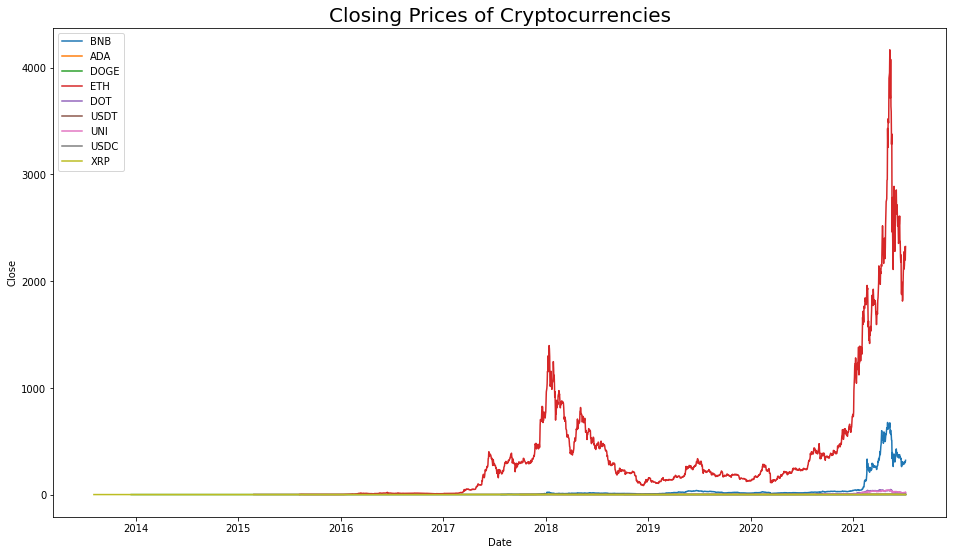

In [129]:
df_without_BTC=top10_df[top10_df.Symbol!='BTC']
plt.figure(figsize=(16,9))
sns.lineplot(data=df_without_BTC, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Cryptocurrencies", fontsize=20)
plt.legend(loc='best')

Now, remove ETH value:

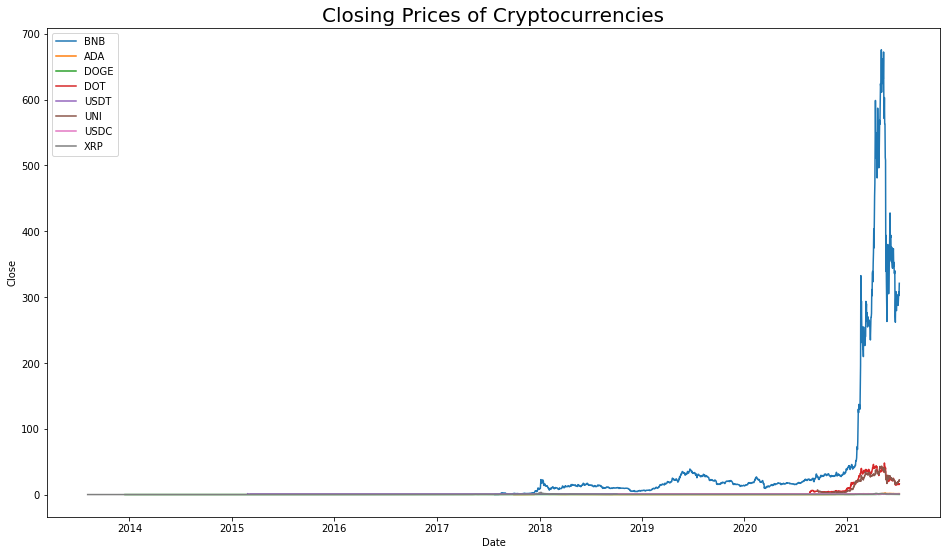

In [133]:
df_without_ETH=top10_df[(top10_df.Symbol!='BTC') & (top10_df.Symbol!='ETH')]
plt.figure(figsize=(16,9))
sns.lineplot(data=df_without_ETH, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Cryptocurrencies", fontsize=20)
plt.legend(loc='best')

Now, remove BNB value:

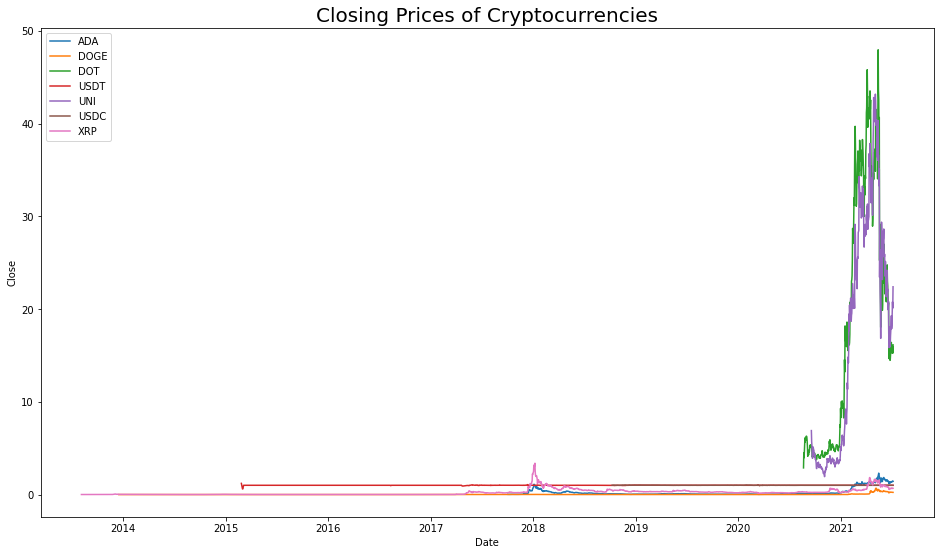

In [134]:
df_without_BNB=top10_df[(top10_df.Symbol!='BTC') & (top10_df.Symbol!='ETH')& (top10_df.Symbol!='BNB')]
plt.figure(figsize=(16,9))
sns.lineplot(data=df_without_BNB, x="Date", y="Close", hue='Symbol')
plt.title("Closing Prices of Cryptocurrencies", fontsize=20)
plt.legend(loc='best')

OBSERVATION:
In 2021 the value of BTC was at all-time high of nearly 60,000$ which is almost 15 times more than the second-highest cryptocurrency ETH .
Among the top cryptocurrencies, the growth of BTC, ETH, and USTD over the last five years was beneficial for the investors.

In [137]:
for i in ['BTC','ETH','USDT','BNB','ADA','DOGE','XRP']:
    options=[i]
    rslt_df = df[df['Symbol'].isin(options)] 
    layout = dict(
            title=f"{i} Candlestick Chart",
            xaxis=go.layout.XAxis(title=go.layout.xaxis.Title( text="Time")),
            yaxis=go.layout.YAxis(title=go.layout.yaxis.Title( text="Price US Dollars"))
    )
    data=[go.Candlestick(x=rslt_df['Date'],
                    open=rslt_df['Open'],
                    high=rslt_df['High'],
                    low=rslt_df['Low'],
                    close=rslt_df['Close'])]
    figSignal = go.Figure(data=data,layout=layout)

    figSignal.show()

Investment in penny cryptocurrencies should be avoided, as depicted by the candlestick chart of USDT.
It is visible in the candlestick chart of USDT that this cryptocurrency is volatile for a longer period.

### Moving Average

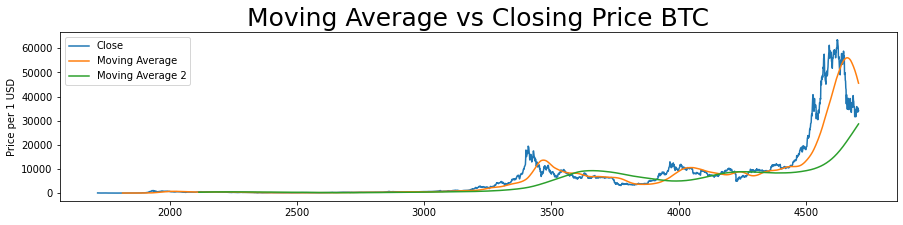

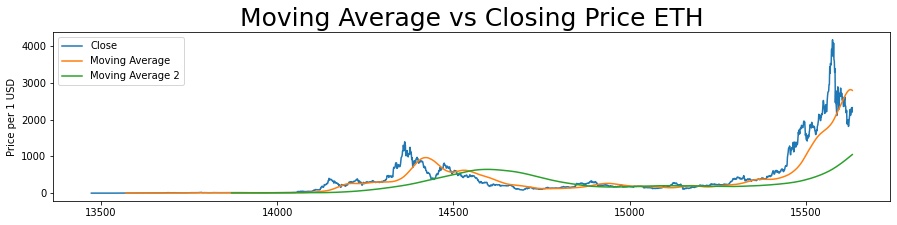

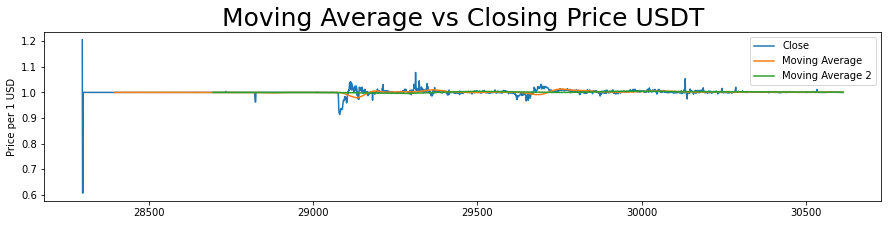

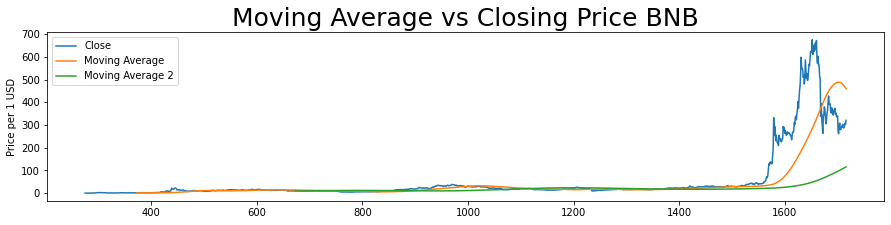

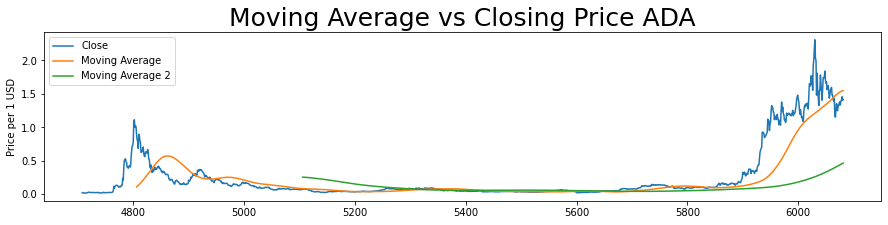

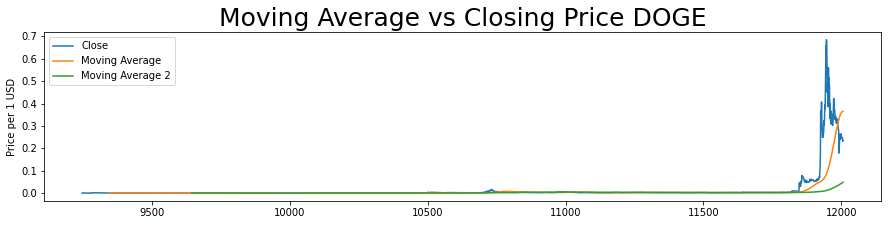

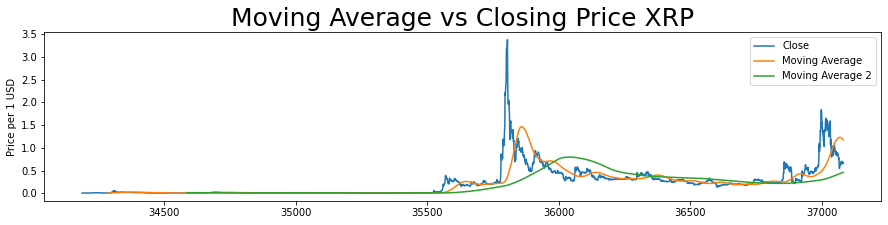

In [138]:
for i in ['BTC','ETH','USDT','BNB','ADA','DOGE','XRP']:
    j=1
    dft=df[df['Symbol']==i]
    top_currency_name = dft.groupby(['Symbol'])['Marketcap'].last().sort_values(ascending=False).index
    top_currency = dft[dft['Symbol'].isin(top_currency_name)]
    top_currency['Moving Average']=top_currency['Close'].rolling(window=50).mean()
    top_currency['Moving Average 2']=top_currency['Close'].rolling(window=200).mean()
    plt.subplot(5,1,j)
    top_currency['Close'].plot(figsize=(15,18))
    ax=top_currency['Moving Average'].rolling(window=50).mean().plot()
    ax=top_currency['Moving Average 2'].rolling(window=200).mean().plot()
    ax.set_ylabel("Price per 1 USD");
    plt.title(f"Moving Average vs Closing Price {i}", fontsize=25);
    plt.legend()
    j=j+1
    plt.show()

They have shown a pattern of 2 golden cross and 2 death cross over the years. The last crossing point of moving averages was golden cross hence it was bullish.

In USDT, there are too many golden cross and death cross. Hence it is a volatile stock and should be avoided for the time being.